In [ ]:
# Rolling mean/std quantify local drift and variability; pairing with z-scores makes cross-asset comparability easy.

# Skew/kurtosis capture shape (asymmetry & tail thickness) — crucial for understanding why Normal VaR can underestimate risk.

# Correlation is the backbone for aggregation and portfolio construction; forcing a minimum overlap avoids unstable pair estimates from tiny samples.

In [ ]:
# Rolling β shows regime shifts (e.g., changing market exposure).

In [1]:
# --- Make local package importable (robust for notebooks in subfolders) ---
import sys
from pathlib import Path

def add_src_to_path(pkg="quantlib", levels_up=3):
    here = Path.cwd().resolve()
    candidates = [here / "src"]
    # also check parents: ../src, ../../src, ...
    for i in range(1, levels_up+1):
        candidates.append(here.parents[i-1] / "src")
    for p in candidates:
        if (p / pkg / "__init__.py").exists():
            sys.path.insert(0, str(p))
            print(f"[OK] Added to sys.path: {p}")
            return p
    raise FileNotFoundError("Could not find src/quantlib/__init__.py relative to this notebook.")

add_src_to_path()


[OK] Added to sys.path: C:\Users\quantbase\Desktop\quant\src


WindowsPath('C:/Users/quantbase/Desktop/quant/src')

In [2]:
# 05_corr_beta.ipynb
import sys, pathlib; sys.path.append(str(pathlib.Path.cwd() / "src"))
from pathlib import Path
import pandas as pd
from quantlib import stats as qstat
import importlib, quantlib.viz as qviz

DATA_INT = Path(r"C:\Users\quantbase\Desktop\quant\data_int")
FIG_DIR = Path(r"C:\Users\quantbase\Desktop\quant\figures"); FIG_DIR.mkdir(exist_ok=True, parents=True)




In [3]:
# --- compute full-sample correlation (min overlap 126) & plot ---
r_1d = pd.read_pickle(DATA_INT / "log_returns_daily.pkl").sort_index()
corr = qstat.corr_full(r_1d, min_obs=126)
corr.to_pickle(DATA_INT/"corr_full_1d.pkl")



C:\Users\quantbase\Desktop\quant\src\quantlib\viz.py:231: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu_r"))
  cmap.set_bad(color="#f0f0f0")


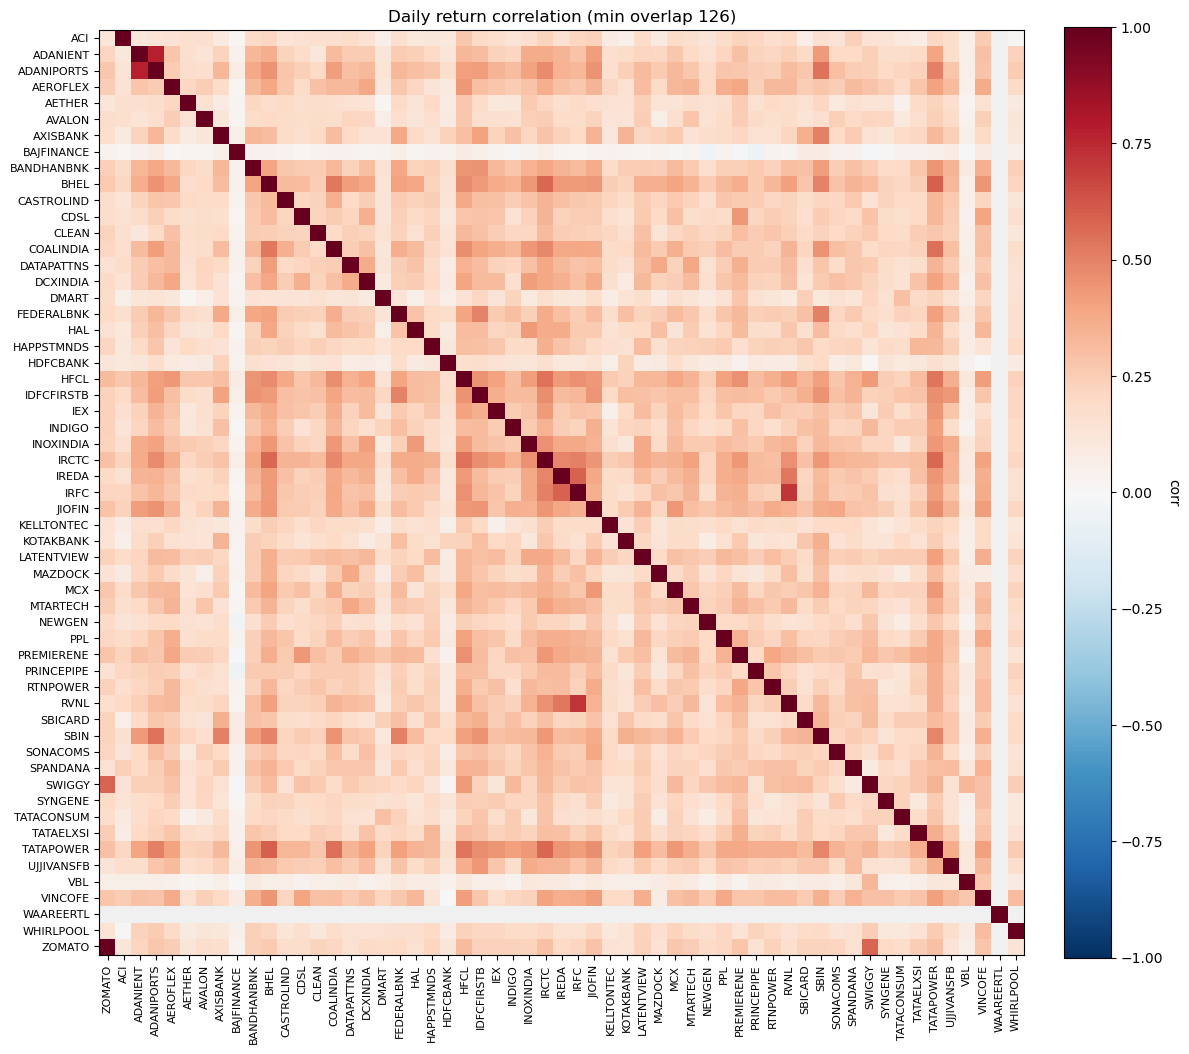

In [13]:
qviz.plot_corr_heatmap(corr, title="Daily return correlation (min overlap 126)", save_path=FIG_DIR/"corr_daily.png")

In [5]:
# --- beta: pick an index proxy column present in r_1d ---
INDEX_COL = "HDFCBANK"  # adjust (+ add NIFTY returns once available)
beta_full = qstat.beta_against_index(r_1d, index_col=INDEX_COL, window=None)
display(beta_full.T.sort_values("full_sample", ascending=False).head(20))
beta_full.to_csv(DATA_INT/"beta_full_1d.csv")


,full_sample
HDFCBANK,1.000000
WAAREERTL,0.317795
IREDA,0.180933
HFCL,0.177277
ADANIPORTS,0.159878
MCX,0.156521
ADANIENT,0.153987
MAZDOCK,0.138953
BHEL,0.137777
JIOFIN,0.136857
